In [1]:
import numpy as np
import matplotlib.pyplot as plt


import pyRTC.utils as utils
from pyRTC import *
from astropy.io import fits

Spinnaker python SDK installation not found
ximea python SDK installation not found
PI python SDK installation not found
Andor python SDK installation not found


In [2]:
shm_names = ["wfs", "wfsRaw", "wfc", "wfc2D", "wfcShape", "signal", "signal2D", "psfShort", "psfLong", "wfsInfo", "loop", "refSlopes", "subApMasks"] #list of SHMs to reset
clear_shms(shm_names)

Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfs_meta
Closing wfs
Creating New Shared Memory Object wfs_gpu_handle
Opening Existing Shared Memory Object wfs_gpu_handle_meta
Closing wfs_meta
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Closing wfs_gpu_handle
Opening Existing Shared Memory Object wfsRaw_meta
Closing wfsRaw
Creating New Shared Memory Object wfsRaw_gpu_handle
Opening Existing Shared Memory Object wfsRaw_gpu_handle_meta
Closing wfsRaw_meta
Opening Existing Shared Memory Object wfc
Opening Existing Shared Memory Object wfc_meta
Closing wfsRaw_gpu_handle
Opening Existing Shared Memory Object wfc_meta
Closing wfc
Creating New Shared Memory Object wfc_gpu_handle
Opening Existing Shared Memory Object wfc_gpu_handle_meta
Closing wfc_meta
Opening Existing Shared Memory Object wfc2D
Opening Existing Shared Memory Object wfc2D_meta
Closing wfc_gpu_handl

Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs_meta'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs_gpu_handle'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfsRaw'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, i

In [3]:
# Get WFS image. make sure to reset SHMs after you're done.
conf = utils.read_yaml_file("config_felixsim.yaml")
wfs_conf = conf["wfs"]
wfs = FELIXSimulator(wfs_conf)
wfs.start()
time.sleep(1)
img = wfs.image.read_noblock()
wfs.stop()
fits.writeto("../pyRTCView/felix_image.fits", img, overwrite=True)

Thread expose: Priority set to REALTIME
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfsInfo
Opening Existing Shared Memory Object wfsInfo_meta


## Init hardware

In [2]:
conf = utils.read_yaml_file("config_felixsim.yaml")
wfs_conf = conf["wfs"]
slopes_conf = conf["slopes"]
dm_conf = conf["wfc"]

In [3]:
wfs = FELIXSimulator(wfs_conf)
slopes = SlopesProcess(conf=slopes_conf)
dm = IRTFASMSimulator(dm_conf, wfs)

Thread expose: Priority set to REALTIME
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfsInfo
Opening Existing Shared Memory Object wfsInfo_meta
Thread computeSignal: Priority set to REALTIME
Opening Existing Shared Memory Object wfs_meta
Closing wfs_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object subApMasks
Opening Existing Shared Memory Object subApMasks_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object signal2D
Opening Existing Shared Memory Object signal2D_meta
Opening Existing Shared Memory Object refSlopes
Opening Existing Shared Memory Object refSlopes_meta
Thread sendToHardware: Priority set to REALTIME
Opening Existing Shared Memory Ob

In [4]:
wfs.start()
slopes.start()
dm.start()

dm.flatten()

In [5]:
loop_conf = conf["loop"]
loop = Loop(loop_conf)

Thread leakyIntegrator: Priority set to REALTIME
Opening Existing Shared Memory Object signal_meta
Closing signal_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object wfc_meta
Closing wfc_meta
Opening Existing Shared Memory Object wfc
Opening Existing Shared Memory Object wfc_meta
Opening Existing Shared Memory Object loop
Opening Existing Shared Memory Object loop_meta
Opening Existing Shared Memory Object wfsInfo_meta
Closing wfsInfo_meta
Opening Existing Shared Memory Object wfsInfo
Opening Existing Shared Memory Object wfsInfo_meta


## Run loop

In [6]:
loop.stop()

In [75]:
loop.setGain(0.0)
loop.leakyGain = 0.0
loop.start()

In [46]:
dm.flatten()

In [45]:
loop.pbGain = 0.0

In [7]:
slopes.refSlopes *= 0

In [43]:
slopes.takeRefSlopes()

In [29]:
wfs.slopeNoise = 0.
wfs.amplitude = 20
wfs.detectorNoise = 5
wfs.lag = 200

In [77]:
loop.numItersIM = 1000
loop.pokeAmp = 0.5

In [78]:
loop.IMMethod = 0#"docrime"
loop.computeIM()
dm.flatten()

In [80]:
loop.saveIM("calib/imat/imat.poke.20250930.a.npy")

In [ ]:
imat_zonal = loop.

In [70]:
loop.loadIM()#"calib/imat/imat.cacofoni.20250930.a.npy")

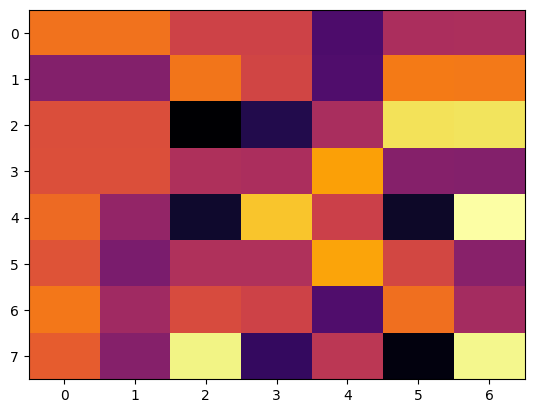

In [79]:
loop.plotIM()

In [72]:
loop.IM

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
loop.setNumDroppedModes(0)

In [35]:
loop.setGain(0.0)
loop.leakyGain = 0.01
loop.start()

In [ ]:
slopes.loadChopMasks("/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/calib/felixcal/masks_itp.fits")

In [20]:
dm.flatten()
slopes.loadSubApMasks()
slopes.loadChopMasks()

In [30]:
slopes.chopSubApsToPosition("BA", 0.2)

In [23]:
slopes.chopSubaps(freq=1,rampFraction=0.4,numIter=2)

In [29]:
loop.stop()

coeffs = np.random.normal(0, 0.02, 7)
coeffs[7:] = 0

#coeffs = np.zeros(36)
#coeffs[0] = 0.02
dm.write(coeffs)
dm.sendToHardware()

In [27]:
slopes.refSlopes *= 0

In [12]:
slopes.loadRefSlopes("calib/felixcal/calpts_32_r0_12x12closed.npy")